In [5]:
import pandas as pd

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
data = pd.read_csv('FEDFUNDS.csv')

In [15]:
data['DATE'] = list(map(lambda x:pd.to_datetime(x),data['DATE']))
data = data.set_index('DATE')
data

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2023-03-01,4.65
2023-04-01,4.83
2023-05-01,5.06


In [17]:
result_add = seasonal_decompose(data['FEDFUNDS'], model='additive')  # Adjust period as needed

# Multiplicative Decomposition
result_mul = seasonal_decompose(data['FEDFUNDS'], model='multiplicative')

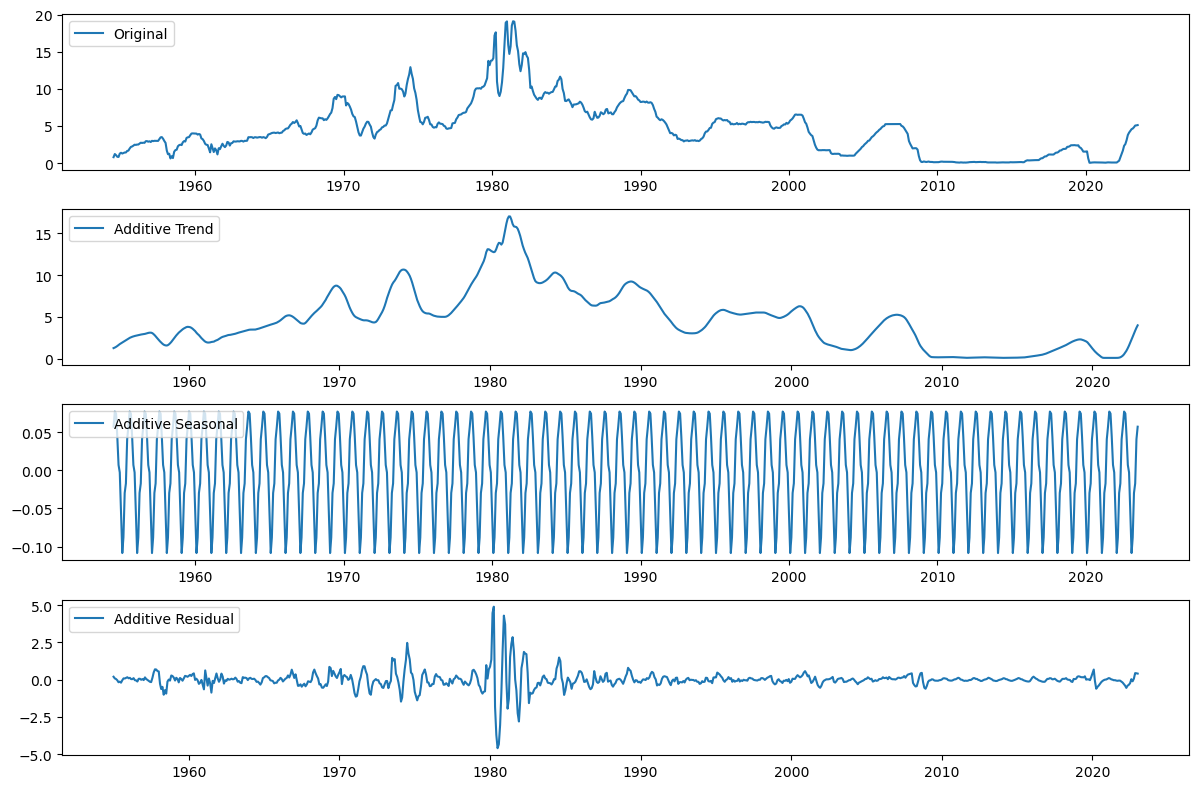

In [20]:
plt.figure(figsize=(12, 8))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(data.index, data['FEDFUNDS'], label='Original')
plt.legend(loc='upper left')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(result_add.trend, label='Additive Trend')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(result_add.resid, label='Additive Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing


/Users/miyawang/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/wy/vtgfkqvd5v9_mxl14t6zf4jc0000gn/T/ipykernel_10511/3478300526.py:14: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=data.index[-1], periods=future_periods + 1, closed='right', freq='M')


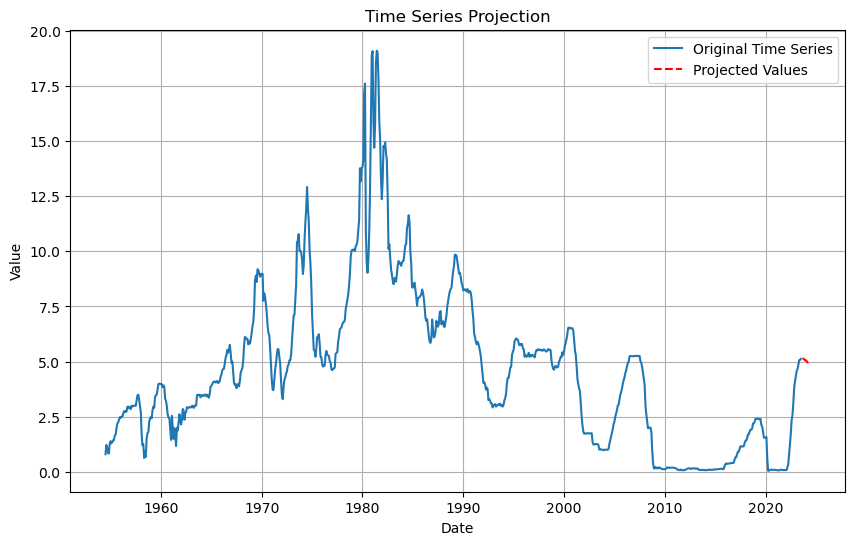

In [44]:
model = ExponentialSmoothing(data['FEDFUNDS'], seasonal='add')  # Adjust seasonal_periods as needed
model_fit = model.fit()

future_periods = 10  # Number of future periods to project
forecast_values = model_fit.forecast(steps=future_periods)

plt.figure(figsize=(10, 6))

# Original Time Series
plt.plot(data.index, data['FEDFUNDS'], label='Original Time Series')


# Projected Values
forecast_index = pd.date_range(start=data.index[-1], periods=future_periods + 1, closed='right', freq='M')
plt.plot(forecast_index[1:], forecast_values, label='Projected Values', linestyle='--', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Projection')
plt.legend()
plt.grid()
plt.show()